# Pompey League 1 Visualisations

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from functools import reduce
import random

In [2]:
rank = pd.read_csv(r'C:\\Users\\alexb\\Downloads\\lg1prankings.csv')

In [3]:
rank.drop(rank.columns[[5, 6]], axis=1, inplace=True)


In [4]:
new_column_names = ['Team', 'Goals Home', 'Goals Conceded Home', 'Home Attack Ranking', 'Home Defence Ranking','Goals Away','Goals Conceded Away','Away Attack Ranking','Away Defence Ranking']
rank.columns = new_column_names



In [5]:
rank.set_index('Team', inplace=True)
rank



,Goals Home,Goals Conceded Home,Home Attack Ranking,Home Defence Ranking,Goals Away,Goals Conceded Away,Away Attack Ranking,Away Defence Ranking
Team,,,,,,,,
Barnsley,1.750000,1.400000,1.236239,1.202230,1.944444,1.111111,1.669765,0.784913
Blackpool,2.000000,0.894737,1.412844,0.768343,0.950000,1.250000,0.815799,0.883028
Bolton Wanderers,2.210526,1.157895,1.561564,0.994326,1.450000,1.050000,1.245167,0.741743
Bristol Rovers,1.444444,1.277778,1.020387,1.097274,1.100000,1.700000,0.944610,1.200917
Burton Albion,0.944444,1.166667,0.667176,1.001859,0.700000,1.450000,0.601115,1.024312
Cambridge United,0.894737,1.052632,0.632062,0.903933,0.789474,1.842105,0.677950,1.301304
Carlisle United,0.894737,1.736842,0.632062,1.491489,0.842105,1.789474,0.723146,1.264124
Charlton Athletic,1.684211,1.421053,1.189763,1.220309,1.250000,1.550000,1.073420,1.094954
Cheltenham Town,1.055556,1.444444,0.745668,1.240397,0.578947,1.263158,0.497163,0.892323


In [6]:
home_attacking_strength = rank['Home Attack Ranking'].to_dict()

In [7]:
away_defensive_strength = rank['Away Defence Ranking'].to_dict()
home_defensive_strength = rank['Home Defence Ranking'].to_dict()
away_attacking_strength = rank['Away Attack Ranking'].to_dict()


In [8]:
all_teams = list(rank.index)

In [9]:
all_season_tables = []
all_matches = []

wins = {}
draws = {}
losses = {}
points = {}
GF = {}
GA = {}
final_points_table = None
for team in all_teams:
    wins[team] = 0
    draws[team] = 0
    losses[team] = 0
    if team == 'Wigan Athletic':
        points[team] = -8
    elif team == 'Reading':
        points[team] = -4
    else:
        points[team] = 0
    GF[team] = 0
    GA[team] = 0
for i in range(0,len(all_teams)):
    for j in range(0,len(all_teams)):
        if i!=j:
            ht = all_teams[i]
            at = all_teams[j]
            #Calculating home team goals:
            #Home team attack strength * away team defence strength * average number of home goals
            effective_home_lambda = home_attacking_strength[ht] * away_defensive_strength[at] * 1.41558441558442
            ht_g = np.random.poisson(effective_home_lambda)
            ht_g = round(ht_g)
            #Calculating home team goals:
            #Home team defense strength * away team attack strength * average number of away goals
            effective_away_lambda = home_defensive_strength[ht] * away_attacking_strength[at] * 1.16450216450216
            at_g = np.random.poisson(effective_away_lambda)
            at_g = round(at_g)
            match = {'Home_Team':all_teams[i],
                     'Away_Team':all_teams[j],
                     'Home_Goals':ht_g,
                     'Away_Goals':at_g}
            all_matches.append(match)
            GF[ht] += ht_g
            GF[at] += at_g
            GA[ht] += at_g
            GA[at] += ht_g
            #Assigning Points:
            if ht_g > at_g:
                wins[ht] +=1
                losses[at] +=1
                points[ht] +=3
            elif ht_g < at_g:
                wins[at] +=1
                losses[ht] +=1
                points[at] +=3
            if ht_g == at_g:
                draws[ht] +=1
                draws[at] +=1
                points[ht] +=1
                points[at] +=1
        else:
            continue
w = pd.DataFrame(list(wins.items()), columns = ['Team','Wins'])
d = pd.DataFrame(list(draws.items()), columns = ['Team','Draws'])
l = pd.DataFrame(list(losses.items()), columns = ['Team','Losses'])
p = pd.DataFrame(list(points.items()), columns = ['Team','Points'])
gf = pd.DataFrame(list(GF.items()), columns = ['Team','GF'])
ga = pd.DataFrame(list(GA.items()), columns = ['Team','GA'])
final_points_table = reduce(lambda left,right: pd.merge(left,right,on='Team'), [w,d,l,p,gf,ga])
final_points_table['GamesPlayed'] = 46
final_points_table['GD'] = final_points_table['GF'] - final_points_table['GA']
final_points_table = final_points_table[['Team','GamesPlayed', 'Wins', 'Draws', 'Losses', 'Points', 'GF', 'GA','GD']].sort_values(['Points','GD', 'GF', 'GA'], ascending = [False,False, False, False]).reset_index(drop = True)
final_points_table['Position'] = range(1,25)            

In [10]:
final_points_table

,Team,GamesPlayed,Wins,Draws,Losses,Points,GF,GA,GD,Position
0,Portsmouth,46,30,8,8,98,80,35,45,1
1,Bolton Wanderers,46,25,11,10,86,77,49,28,2
2,Derby County,46,25,10,11,85,84,44,40,3
3,Stevenage,46,23,15,8,84,59,35,24,4
4,Northampton Town,46,24,10,12,82,69,53,16,5
5,Blackpool,46,23,11,12,80,80,58,22,6
6,Peterborough United,46,23,10,13,79,86,57,29,7
7,Lincoln City,46,20,16,10,76,62,40,22,8
8,Reading,46,24,7,15,75,81,53,28,9
9,Barnsley,46,20,15,11,75,89,63,26,10


In [11]:
all_season_tables = []
all_matches = []
introduce_randomness = True
for season in range(1,1001):
    wins = {}
    draws = {}
    losses = {}
    points = {}
    GF = {}
    GA = {}
    final_points_table = None
    for team in all_teams:
        wins[team] = 0
        draws[team] = 0
        losses[team] = 0
        # if team == 'Wigan Athletic':
        #     points[team] = -8
        # elif team == 'Reading':
        #     points[team] = -4
        # else:
        points[team] = 0
        GF[team] = 0
        GA[team] = 0
    for i in range(0,len(all_teams)):
        for j in range(0,len(all_teams)):
            if i!=j:
                ht = all_teams[i]
                at = all_teams[j]

                #Calculating home team goals:
                #Home team attack strength * away team defence strength * average number of home goals
                effective_home_lambda = home_attacking_strength[ht] * away_defensive_strength[at] * 1.41558441558442
                effective_home_lambda = effective_home_lambda + random.random() if introduce_randomness else effective_home_lambda
                ht_g = np.random.poisson(effective_home_lambda)
                ht_g = round(ht_g)

                #Calculating home team goals:
                #Home team defense strength * away team attack strength * average number of away goals
                effective_away_lambda = home_defensive_strength[ht] * away_attacking_strength[at] * 1.16450216450216
                effective_away_lambda = effective_away_lambda + random.random() if introduce_randomness else effective_away_lambda
                at_g = np.random.poisson(effective_away_lambda)
                at_g = round(at_g)


                match = {'Home_Team':all_teams[i],
                         'Away_Team':all_teams[j],
                        'Home_Goals':ht_g,
                        'Away_Goals':at_g,
                        'Season':season}
                all_matches.append(match)

                GF[ht] += ht_g
                GF[at] += at_g
                GA[ht] += at_g
                GA[at] += ht_g

                #Assigning Points:
                if ht_g > at_g:
                    wins[ht] +=1
                    losses[at] +=1
                    points[ht] +=3
                elif ht_g < at_g:
                    wins[at] +=1
                    losses[ht] +=1
                    points[at] +=3
                if ht_g == at_g:
                    draws[ht] +=1
                    draws[at] +=1
                    points[ht] +=1
                    points[at] +=1
            else:
                continue
    w = pd.DataFrame(list(wins.items()), columns = ['Team','Wins'])
    d = pd.DataFrame(list(draws.items()), columns = ['Team','Draws'])
    l = pd.DataFrame(list(losses.items()), columns = ['Team','Losses'])
    p = pd.DataFrame(list(points.items()), columns = ['Team','Points'])
    gf = pd.DataFrame(list(GF.items()), columns = ['Team','GF'])
    ga = pd.DataFrame(list(GA.items()), columns = ['Team','GA'])
    final_points_table = reduce(lambda left,right: pd.merge(left,right,on='Team'), [w,d,l,p,gf,ga])
    final_points_table['GamesPlayed'] = 46
    final_points_table['GD'] = final_points_table['GF'] - final_points_table['GA']
    final_points_table = final_points_table[['Team',
                                             'GamesPlayed', 
                                             'Wins', 
                                             'Draws', 
                                             'Losses', 
                                             'Points', 
                                             'GF', 
                                             'GA',
                                             'GD']].sort_values(['Points','GD', 'GF', 'GA'], 
                                                                ascending = [False,False, False, False]).reset_index(drop = True)
    final_points_table['Position'] = range(1,25)
    final_points_table['Season'] = season
    
    all_season_tables.append(final_points_table)
            

In [12]:
all_season_tables

[                   Team  GamesPlayed  Wins  Draws  Losses  Points   GF   GA   
 0      Bolton Wanderers           46    27      7      12      88  104   66  \
 1             Stevenage           46    23     11      12      80   91   69   
 2   Peterborough United           46    23     10      13      79  108   80   
 3          Lincoln City           46    23      8      15      77   94   64   
 4          Derby County           46    22     11      13      77   93   66   
 5        Wigan Athletic           46    23      8      15      77   82   70   
 6     Wycombe Wanderers           46    23      6      17      75  101   82   
 7              Barnsley           46    20     13      13      73   99   77   
 8            Portsmouth           46    20     11      15      71  101   76   
 9         Oxford United           46    21      8      17      71   86   82   
 10       Bristol Rovers           46    19     12      15      69   92   87   
 11    Charlton Athletic           46   

In [13]:
all_season_tables = pd.concat(all_season_tables)
all_season_tables.groupby(['Position','Team']).size().reset_index(name='TimesFinished').sort_values(['Position','TimesFinished'], ascending=[True,False]).reset_index(drop=True).head(50)

,Position,Team,TimesFinished
0,1,Derby County,358
1,1,Portsmouth,231
2,1,Bolton Wanderers,126
3,1,Peterborough United,102
4,1,Barnsley,68
5,1,Lincoln City,68
6,1,Blackpool,20
7,1,Stevenage,12
8,1,Oxford United,7
9,1,Leyton Orient,3


In [14]:
finishing_pos = all_season_tables.groupby(['Position','Team']).size().reset_index(name='TimesFinished').sort_values(['Position','TimesFinished'], ascending=[True,False]).reset_index(drop=True)

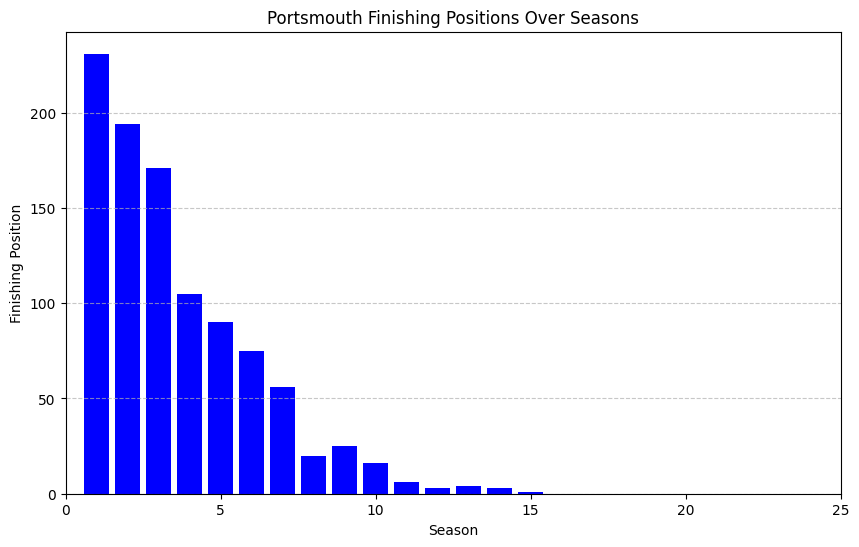

In [15]:
import matplotlib.pyplot as plt

# Filter the data for Portsmouth
portsmouth_data = finishing_pos[finishing_pos['Team'] == 'Portsmouth']

# Plot the finishing positions of Portsmouth
plt.figure(figsize=(10, 6))
plt.bar(portsmouth_data['Position'], portsmouth_data['TimesFinished'], color='blue')
plt.xlabel('Season')
plt.ylabel('Finishing Position')
plt.title('Portsmouth Finishing Positions Over Seasons')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlim(0, 25)
plt.show()

In [16]:
all_season_tables = []
all_matches = []
introduce_randomness = True
for season in range(1,1001):

    wins = {}
    draws = {}
    losses = {}
    points = {}
    GF = {}
    GA = {}
    final_points_table = None

    fixtures = {'Portsmouth': ['Barnsley', 'Derby County', 'Shrewsbury Town', 'Wigan Athletic'],
    'Barnsley':['Cambridge United', 'Reading', 'Northampton Town'],
    'Blackpool':['Fleetwood Town', 'Wycombe Wanderers', 'Cambridge United', 'Barnsley'],
    'Bolton Wanderers': ['Shrewsbury Town', 'Reading', 'Portsmouth', 'Port Vale'],
    'Bristol Rovers' : ['Reading', 'Shrewsbury Town', 'Bolton Wanderers', 'Cambridge United', 'Peterborough United'],
    'Burton Albion' : ['Port Vale', 'Barnsley', 'Oxford United', 'Cheltenham Town', 'Reading'],
    'Cambridge United' : ['Wycombe Wanderers', 'Wigan Athletic', 'Charlton Athletic', 'Derby County'],
    'Carlisle United' : ['Stevenage', 'Lincoln City', 'Blackpool', 'Wycombe Wanderers'],
    'Charlton Athletic' : ['Wigan Athletic', 'Stevenage', 'Barnsley', 'Shrewsbury Town'],
    'Cheltenham Town' : ['Peterborough United', 'Exeter City', 'Carlisle United', 'Bristol Rovers', 'Lincoln City'],
    'Derby County': ['Blackpool', 'Leyton Orient', 'Carlisle United'],
    'Exeter City' : ['Charlton Athletic', 'Stevenage', 'Oxford United'],
    'Fleetwood Town' : ['Cheltenham Town', 'Northampton Town', 'Burton Albion'],
    'Leyton Orient' : ['Exeter City', 'Peterborough United', 'Cheltenham Town', 'Fleetwood Town'],
    'Lincoln City' : ['Leyton Orient', 'Wigan Athletic', 'Portsmouth'],
    'Northampton Town' : ['Derby County', 'Port Vale', 'Carlisle United', 'Exeter City'],
    'Oxford United' : ['Lincoln City', 'Fleetwood Town', 'Peterborough United', 'Stevenage'],
    'Peterborough United' : ['Carlisle United', 'Bolton Wanderers', 'Port Vale', 'Fleetwood Town'],
    'Port Vale' : ['Bristol Rovers', 'Exeter City', 'Cambridge United', 'Wycombe Wanderers'],
    'Reading' : ['Northampton Town', 'Lincoln City', 'Blackpool'],
    'Shrewsbury Town' : ['Oxford United', 'Wycombe Wanderers', 'Leyton Orient'],
    'Stevenage' : ['Bolton Wanderers', 'Barnsley', 'Burton Albion', 'Cheltenham Town'],
    'Wigan Athletic' : ['Burton Albion', 'Port Vale', 'Bristol Rovers'],
    'Wycombe Wanderers' : ['Portsmouth', 'Charlton Athletic', 'Derby County']}

    for team in all_teams:
        if team =='Portsmouth':
            wins[team] = 24
            draws[team] = 11
            losses[team] = 4
            points[team] = 83
            GF[team] = 63
            GA[team] = 31
        if team == 'Derby County':
            wins[team] = 24
            draws[team] = 6
            losses[team] = 9
            points[team] = 78
            GF[team] = 69
            GA[team] = 34
        if team == 'Bolton Wanderers':
            wins[team] = 22
            draws[team] = 8
            losses[team] = 9
            points[team] = 74
            GF[team] = 71
            GA[team] = 43
        if team == 'Peterborough United':
            wins[team] = 21
            draws[team] = 8
            losses[team] = 9
            points[team] = 71
            GF[team] = 74
            GA[team] = 46
        if team == 'Barnsley':
            wins[team] = 20
            draws[team] = 11
            losses[team] = 7
            points[team] = 71
            GF[team] = 70
            GA[team] = 48
        if team == 'Oxford United':
            wins[team] = 18
            draws[team] = 9
            losses[team] = 12
            points[team] = 63
            GF[team] = 62
            GA[team] = 52
        if team == 'Lincoln City':
            wins[team] = 16
            draws[team] = 13
            losses[team] = 10
            points[team] = 61
            GF[team] = 56
            GA[team] = 33
        if team == 'Stevenage':
            wins[team] = 17
            draws[team] = 10
            losses[team] = 11
            points[team] = 61
            GF[team] = 49
            GA[team] = 38
        if team == 'Blackpool':
            wins[team] = 17
            draws[team] = 9
            losses[team] = 13
            points[team] = 60
            GF[team] = 57
            GA[team] = 42
        if team == 'Leyton Orient':
            wins[team] = 16
            draws[team] = 10
            losses[team] = 13
            points[team] = 58
            GF[team] = 44
            GA[team] = 44
        if team == 'Wigan Athletic':
            wins[team] = 17
            draws[team] = 5
            losses[team] = 15
            points[team] = 50
            GF[team] = 53
            GA[team] = 48
        if team == 'Wycombe Wanderers':
            wins[team] = 13
            draws[team] = 11
            losses[team] = 14
            points[team] = 50
            GF[team] = 50
            GA[team] = 49
        if team == 'Bristol Rovers':
            wins[team] = 14
            draws[team] = 8
            losses[team] = 16
            points[team] = 50
            GF[team] = 48
            GA[team] = 57
        if team == 'Northampton Town':
            wins[team] = 14
            draws[team] = 8
            losses[team] = 17
            points[team] = 50
            GF[team] = 50
            GA[team] = 60
        if team == 'Exeter City':
            wins[team] = 13
            draws[team] = 8
            losses[team] = 18
            points[team] = 47
            GF[team] = 33
            GA[team] = 52
        if team == 'Charlton Athletic':
            wins[team] = 10
            draws[team] = 15
            losses[team] = 14
            points[team] = 45
            GF[team] = 57
            GA[team] = 58
        if team == 'Reading':
            wins[team] = 13
            draws[team] = 9
            losses[team] = 17
            points[team] = 42
            GF[team] = 55
            GA[team] = 57
        if team == 'Shrewsbury Town':
            wins[team] = 13
            draws[team] = 5
            losses[team] = 21
            points[team] = 44
            GF[team] = 29
            GA[team] = 55
        if team == 'Burton Albion':
            wins[team] = 10
            draws[team] = 9
            losses[team] = 19
            points[team] = 39
            GF[team] = 31
            GA[team] = 50
        if team == 'Cambridge United':
            wins[team] = 10
            draws[team] = 9
            losses[team] = 19
            points[team] = 39
            GF[team] = 32
            GA[team] = 55
        if team == 'Cheltenham Town':
            wins[team] = 9
            draws[team] = 8
            losses[team] = 20
            points[team] = 35
            GF[team] = 30
            GA[team] = 50
        if team == 'Fleetwood Town':
            wins[team] = 7
            draws[team] = 13
            losses[team] = 19
            points[team] = 34
            GF[team] = 41
            GA[team] = 61
        if team == 'Port Vale':
            wins[team] = 8
            draws[team] = 9
            losses[team] = 20
            points[team] = 33
            GF[team] = 35
            GA[team] = 61
        if team == 'Carlisle United':
            wins[team] = 5
            draws[team] = 8
            losses[team] = 25
            points[team] = 23
            GF[team] = 33
            GA[team] = 67

    for ht, at in fixtures.items():
        for at in fixtures[ht]:
            effective_home_lambda = home_attacking_strength[ht] * away_defensive_strength[at] * 1.41558441558442
            effective_home_lambda = effective_home_lambda + random.random() if introduce_randomness else effective_home_lambda
            ht_g = np.random.poisson(effective_home_lambda)
            ht_g = round(ht_g)
            effective_away_lambda = home_defensive_strength[ht] * away_attacking_strength[at] * 1.16450216450216
            effective_away_lambda = effective_away_lambda + random.random() if introduce_randomness else effective_away_lambda
            at_g = np.random.poisson(effective_away_lambda)
            at_g = round(at_g)
            match = {'Home_Team':ht,
                    'Away_Team':at,
                    'Home_Goals':ht_g,
                    'Away_Goals':at_g,
                    'Season':season}
            all_matches.append(match)
            GF[ht] += ht_g
            GF[at] += at_g
            GA[ht] += at_g
            GA[at] += ht_g
            #Assigning Points:
            if ht_g > at_g:
                wins[ht] +=1
                losses[at] +=1
                points[ht] +=3
            elif ht_g < at_g:
                wins[at] +=1
                losses[ht] +=1
                points[at] +=3
            if ht_g == at_g:
                draws[ht] +=1
                draws[at] +=1
                points[ht] +=1
                points[at] +=1
        else:
            continue
    w = pd.DataFrame(list(wins.items()), columns = ['Team','Wins'])
    d = pd.DataFrame(list(draws.items()), columns = ['Team','Draws'])
    l = pd.DataFrame(list(losses.items()), columns = ['Team','Losses'])
    p = pd.DataFrame(list(points.items()), columns = ['Team','Points'])
    gf = pd.DataFrame(list(GF.items()), columns = ['Team','GF'])
    ga = pd.DataFrame(list(GA.items()), columns = ['Team','GA'])
    final_points_table = reduce(lambda left,right: pd.merge(left,right,on='Team'), [w,d,l,p,gf,ga])
    final_points_table['GamesPlayed'] = 46
    final_points_table['GD'] = final_points_table['GF'] - final_points_table['GA']
    final_points_table = final_points_table[['Team','GamesPlayed', 'Wins', 'Draws', 'Losses', 'Points', 'GF', 'GA','GD']].sort_values(['Points','GD', 'GF', 'GA'], ascending = [False,False, False, False]).reset_index(drop = True)
    final_points_table['Position'] = range(1,25)            
    final_points_table['Season'] = season
    all_season_tables.append(final_points_table)

In [17]:
all_season_tables=pd.concat(all_season_tables)

In [18]:
all_season_tables.to_csv('17MarTable.csv')

In [19]:
all_season_tables

,Team,GamesPlayed,Wins,Draws,Losses,Points,GF,GA,GD,Position,Season
0,Derby County,46,30,6,10,96,86,43,43,1,1
1,Portsmouth,46,26,14,6,92,74,41,33,2,1
2,Peterborough United,46,26,9,11,87,92,61,31,3,1
3,Bolton Wanderers,46,25,11,10,86,86,56,30,4,1
4,Barnsley,46,24,12,10,84,88,64,24,5,1
...,...,...,...,...,...,...,...,...,...,...,...
19,Shrewsbury Town,46,13,9,24,48,36,67,-31,20,1000
20,Cambridge United,46,12,10,24,46,39,69,-30,21,1000
21,Port Vale,46,11,10,25,43,45,79,-34,22,1000
22,Fleetwood Town,46,8,15,23,39,48,73,-25,23,1000


In [20]:
TwentyFourMarchTable = []
all_matches = []
introduce_randomness = True
for season in range(1,1001):

    wins = {}
    draws = {}
    losses = {}
    points = {}
    GF = {}
    GA = {}
    final_points_table = None

    fixtures = {'Portsmouth': ['Barnsley', 'Derby County', 'Shrewsbury Town', 'Wigan Athletic'],
    'Barnsley':['Cambridge United', 'Reading', 'Northampton Town'],
    'Blackpool':['Fleetwood Town', 'Wycombe Wanderers', 'Cambridge United', 'Barnsley'],
    'Bolton Wanderers': ['Shrewsbury Town', 'Reading', 'Portsmouth', 'Port Vale'],
    'Bristol Rovers' : ['Reading', 'Shrewsbury Town', 'Bolton Wanderers', 'Cambridge United', 'Peterborough United'],
    'Burton Albion' : ['Barnsley', 'Oxford United', 'Cheltenham Town', 'Reading'],
    'Cambridge United' : ['Wycombe Wanderers', 'Wigan Athletic', 'Charlton Athletic', 'Derby County'],
    'Carlisle United' : ['Lincoln City', 'Blackpool', 'Wycombe Wanderers'],
    'Charlton Athletic' : ['Wigan Athletic', 'Stevenage', 'Barnsley', 'Shrewsbury Town'],
    'Cheltenham Town' : ['Peterborough United', 'Exeter City', 'Carlisle United', 'Bristol Rovers', 'Lincoln City'],
    'Derby County': ['Blackpool', 'Leyton Orient', 'Carlisle United'],
    'Exeter City' : ['Charlton Athletic', 'Stevenage', 'Oxford United'],
    'Fleetwood Town' : ['Cheltenham Town', 'Northampton Town', 'Burton Albion'],
    'Leyton Orient' : ['Exeter City', 'Peterborough United', 'Cheltenham Town', 'Fleetwood Town'],
    'Lincoln City' : ['Leyton Orient', 'Wigan Athletic', 'Portsmouth'],
    'Northampton Town' : ['Port Vale', 'Carlisle United', 'Exeter City'],
    'Oxford United' : ['Lincoln City', 'Fleetwood Town', 'Peterborough United', 'Stevenage'],
    'Peterborough United' : ['Carlisle United', 'Bolton Wanderers', 'Port Vale', 'Fleetwood Town'],
    'Port Vale' : ['Bristol Rovers', 'Exeter City', 'Cambridge United', 'Wycombe Wanderers'],
    'Reading' : ['Northampton Town', 'Lincoln City', 'Blackpool'],
    'Shrewsbury Town' : ['Oxford United', 'Wycombe Wanderers', 'Leyton Orient'],
    'Stevenage' : ['Bolton Wanderers', 'Barnsley', 'Burton Albion', 'Cheltenham Town'],
    'Wigan Athletic' : ['Burton Albion', 'Port Vale', 'Bristol Rovers'],
    'Wycombe Wanderers' : ['Portsmouth', 'Charlton Athletic', 'Derby County']}

    for team in all_teams:
        if team =='Portsmouth':
            wins[team] = 24
            draws[team] = 11
            losses[team] = 4
            points[team] = 83
            GF[team] = 63
            GA[team] = 31
        if team == 'Derby County':
            wins[team] = 24
            draws[team] = 6
            losses[team] = 10
            points[team] = 78
            GF[team] = 69
            GA[team] = 35
        if team == 'Bolton Wanderers':
            wins[team] = 22
            draws[team] = 8
            losses[team] = 9
            points[team] = 74
            GF[team] = 71
            GA[team] = 43
        if team == 'Peterborough United':
            wins[team] = 21
            draws[team] = 8
            losses[team] = 9
            points[team] = 71
            GF[team] = 74
            GA[team] = 46
        if team == 'Barnsley':
            wins[team] = 20
            draws[team] = 11
            losses[team] = 7
            points[team] = 71
            GF[team] = 70
            GA[team] = 48
        if team == 'Oxford United':
            wins[team] = 18
            draws[team] = 9
            losses[team] = 12
            points[team] = 63
            GF[team] = 62
            GA[team] = 52
        if team == 'Lincoln City':
            wins[team] = 16
            draws[team] = 13
            losses[team] = 10
            points[team] = 61
            GF[team] = 56
            GA[team] = 33
        if team == 'Stevenage':
            wins[team] = 17
            draws[team] = 11
            losses[team] = 11
            points[team] = 62
            GF[team] = 51
            GA[team] = 40
        if team == 'Blackpool':
            wins[team] = 17
            draws[team] = 9
            losses[team] = 13
            points[team] = 60
            GF[team] = 57
            GA[team] = 42
        if team == 'Leyton Orient':
            wins[team] = 16
            draws[team] = 10
            losses[team] = 13
            points[team] = 58
            GF[team] = 44
            GA[team] = 44
        if team == 'Wigan Athletic':
            wins[team] = 17
            draws[team] = 5
            losses[team] = 15
            points[team] = 50
            GF[team] = 53
            GA[team] = 48
        if team == 'Wycombe Wanderers':
            wins[team] = 13
            draws[team] = 11
            losses[team] = 14
            points[team] = 50
            GF[team] = 50
            GA[team] = 49
        if team == 'Bristol Rovers':
            wins[team] = 14
            draws[team] = 8
            losses[team] = 16
            points[team] = 50
            GF[team] = 48
            GA[team] = 57
        if team == 'Northampton Town':
            wins[team] = 15
            draws[team] = 8
            losses[team] = 17
            points[team] = 53
            GF[team] = 51
            GA[team] = 60
        if team == 'Exeter City':
            wins[team] = 13
            draws[team] = 8
            losses[team] = 18
            points[team] = 47
            GF[team] = 33
            GA[team] = 52
        if team == 'Charlton Athletic':
            wins[team] = 10
            draws[team] = 15
            losses[team] = 14
            points[team] = 45
            GF[team] = 57
            GA[team] = 58
        if team == 'Reading':
            wins[team] = 13
            draws[team] = 9
            losses[team] = 17
            points[team] = 42
            GF[team] = 55
            GA[team] = 57
        if team == 'Shrewsbury Town':
            wins[team] = 13
            draws[team] = 5
            losses[team] = 21
            points[team] = 44
            GF[team] = 29
            GA[team] = 55
        if team == 'Burton Albion':
            wins[team] = 10
            draws[team] = 9
            losses[team] = 20
            points[team] = 39
            GF[team] = 31
            GA[team] = 51
        if team == 'Cambridge United':
            wins[team] = 10
            draws[team] = 9
            losses[team] = 19
            points[team] = 39
            GF[team] = 32
            GA[team] = 55
        if team == 'Cheltenham Town':
            wins[team] = 9
            draws[team] = 8
            losses[team] = 20
            points[team] = 35
            GF[team] = 30
            GA[team] = 50
        if team == 'Fleetwood Town':
            wins[team] = 7
            draws[team] = 13
            losses[team] = 19
            points[team] = 34
            GF[team] = 41
            GA[team] = 61
        if team == 'Port Vale':
            wins[team] = 9
            draws[team] = 9
            losses[team] = 20
            points[team] = 36
            GF[team] = 36
            GA[team] = 61
        if team == 'Carlisle United':
            wins[team] = 5
            draws[team] = 9
            losses[team] = 25
            points[team] = 24
            GF[team] = 35
            GA[team] = 69

    for ht, at in fixtures.items():
        for at in fixtures[ht]:
            effective_home_lambda = home_attacking_strength[ht] * away_defensive_strength[at] * 1.41558441558442
            effective_home_lambda = effective_home_lambda + random.random() if introduce_randomness else effective_home_lambda
            ht_g = np.random.poisson(effective_home_lambda)
            ht_g = round(ht_g)
            effective_away_lambda = home_defensive_strength[ht] * away_attacking_strength[at] * 1.16450216450216
            effective_away_lambda = effective_away_lambda + random.random() if introduce_randomness else effective_away_lambda
            at_g = np.random.poisson(effective_away_lambda)
            at_g = round(at_g)
            match = {'Home_Team':ht,
                    'Away_Team':at,
                    'Home_Goals':ht_g,
                    'Away_Goals':at_g,
                    'Season':season}
            all_matches.append(match)
            GF[ht] += ht_g
            GF[at] += at_g
            GA[ht] += at_g
            GA[at] += ht_g
            #Assigning Points:
            if ht_g > at_g:
                wins[ht] +=1
                losses[at] +=1
                points[ht] +=3
            elif ht_g < at_g:
                wins[at] +=1
                losses[ht] +=1
                points[at] +=3
            if ht_g == at_g:
                draws[ht] +=1
                draws[at] +=1
                points[ht] +=1
                points[at] +=1
        else:
            continue
    w = pd.DataFrame(list(wins.items()), columns = ['Team','Wins'])
    d = pd.DataFrame(list(draws.items()), columns = ['Team','Draws'])
    l = pd.DataFrame(list(losses.items()), columns = ['Team','Losses'])
    p = pd.DataFrame(list(points.items()), columns = ['Team','Points'])
    gf = pd.DataFrame(list(GF.items()), columns = ['Team','GF'])
    ga = pd.DataFrame(list(GA.items()), columns = ['Team','GA'])
    final_points_table = reduce(lambda left,right: pd.merge(left,right,on='Team'), [w,d,l,p,gf,ga])
    final_points_table['GamesPlayed'] = 46
    final_points_table['GD'] = final_points_table['GF'] - final_points_table['GA']
    final_points_table = final_points_table[['Team','GamesPlayed', 'Wins', 'Draws', 'Losses', 'Points', 'GF', 'GA','GD']].sort_values(['Points','GD', 'GF', 'GA'], ascending = [False,False, False, False]).reset_index(drop = True)
    final_points_table['Position'] = range(1,25)            
    final_points_table['Season'] = season
    TwentyFourMarchTable.append(final_points_table)

In [21]:
TwentyFour = pd.concat(TwentyFourMarchTable)
TwentyFour
TwentyFour.to_csv('24MarTable.csv')

In [22]:
import matplotlib.pyplot as plt
finishing_pos = TwentyFour.groupby(['Position','Team']).size().reset_index(name='TimesFinished').sort_values(['Position','TimesFinished'], ascending=[True,False]).reset_index(drop=True)
# Filter the data for Portsmouth
portsmouth_data24 = finishing_pos[finishing_pos['Team'] == 'Portsmouth']
portsmouth_data24
# Plot the finishing positions of Portsmouth
# plt.figure(figsize=(10, 6))
# plt.bar(portsmouth_data['Position'], portsmouth_data['TimesFinished'], color='blue')
# plt.xlabel('Season')
# plt.ylabel('Finishing Position')
# plt.title('Portsmouth Finishing Positions Over Seasons')
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.xlim(0, 25)
# plt.show()

,Position,Team,TimesFinished
0,1,Portsmouth,751
8,2,Portsmouth,159
14,3,Portsmouth,57
19,4,Portsmouth,25
28,5,Portsmouth,8


In [23]:
times_finished = all_season_tables.groupby(['Position','Team']).size().reset_index(name='TimesFinished').sort_values(['Position','TimesFinished'], ascending=[True,False]).reset_index(drop=True)

In [24]:
points_total = final_points_table.groupby(['Position','Team', 'Points']).size().reset_index(name='TimesFinished_Pts').sort_values(['Position','Points'], ascending=[True,False]).reset_index(drop=True)
points_total

,Position,Team,Points,TimesFinished_Pts
0,1,Derby County,93,1
1,2,Portsmouth,93,1
2,3,Peterborough United,88,1
3,4,Barnsley,84,1
4,5,Bolton Wanderers,81,1
5,6,Oxford United,74,1
6,7,Blackpool,72,1
7,8,Lincoln City,71,1
8,9,Stevenage,71,1
9,10,Leyton Orient,70,1


In [25]:
points_total = TwentyFour.groupby(['Position','Team', 'Points']).size().reset_index(name='TimesFinished_Pts').sort_values(['Position','Points'], ascending=[True,False]).reset_index(drop=True)
club_points_total = points_total[points_total['Team'] == 'Portsmouth']
club_points_total

,Position,Team,Points,TimesFinished_Pts
0,1,Portsmouth,104,2
1,1,Portsmouth,102,12
2,1,Portsmouth,101,20
3,1,Portsmouth,100,26
4,1,Portsmouth,99,53
5,1,Portsmouth,98,72
6,1,Portsmouth,97,72
8,1,Portsmouth,96,128
12,1,Portsmouth,95,108
14,1,Portsmouth,94,86


In [26]:
TwentyNineTable = []
all_matches = []
introduce_randomness = True
for season in range(1,10001):

    wins = {}
    draws = {}
    losses = {}
    points = {}
    GF = {}
    GA = {}
    final_points_table = None

    fixtures = {'Portsmouth': ['Barnsley', 'Derby County', 'Shrewsbury Town', 'Wigan Athletic'],
    'Barnsley':['Reading', 'Northampton Town'],
    'Blackpool':['Fleetwood Town', 'Wycombe Wanderers', 'Cambridge United', 'Barnsley'],
    'Bolton Wanderers': ['Shrewsbury Town', 'Reading', 'Portsmouth', 'Port Vale'],
    'Bristol Rovers' : ['Reading', 'Shrewsbury Town', 'Bolton Wanderers', 'Cambridge United', 'Peterborough United'],
    'Burton Albion' : ['Barnsley', 'Oxford United', 'Cheltenham Town', 'Reading'],
    'Cambridge United' : ['Wycombe Wanderers', 'Wigan Athletic', 'Charlton Athletic', 'Derby County'],
    'Carlisle United' : ['Lincoln City', 'Blackpool', 'Wycombe Wanderers'],
    'Charlton Athletic' : ['Wigan Athletic', 'Stevenage', 'Barnsley', 'Shrewsbury Town'],
    'Cheltenham Town' : ['Peterborough United', 'Exeter City', 'Carlisle United', 'Bristol Rovers', 'Lincoln City'],
    'Derby County': ['Leyton Orient', 'Carlisle United'],
    'Exeter City' : ['Stevenage', 'Oxford United'],
    'Fleetwood Town' : ['Northampton Town', 'Burton Albion'],
    'Leyton Orient' : ['Exeter City', 'Peterborough United', 'Cheltenham Town', 'Fleetwood Town'],
    'Lincoln City' : ['Wigan Athletic', 'Portsmouth'],
    'Northampton Town' : ['Port Vale', 'Carlisle United', 'Exeter City'],
    'Oxford United' : ['Lincoln City', 'Fleetwood Town', 'Peterborough United', 'Stevenage'],
    'Peterborough United' : ['Bolton Wanderers', 'Port Vale', 'Fleetwood Town'],
    'Port Vale' : ['Exeter City', 'Cambridge United', 'Wycombe Wanderers'],
    'Reading' : ['Lincoln City', 'Blackpool'],
    'Shrewsbury Town' : ['Wycombe Wanderers', 'Leyton Orient'],
    'Stevenage' : ['Barnsley', 'Burton Albion', 'Cheltenham Town'],
    'Wigan Athletic' : ['Port Vale', 'Bristol Rovers'],
    'Wycombe Wanderers' : ['Charlton Athletic', 'Derby County']}

    for team in all_teams:
        if team =='Portsmouth':
            wins[team] = 25
            draws[team] = 11
            losses[team] = 4
            points[team] = 86
            GF[team] = 66
            GA[team] = 33
        if team == 'Derby County':
            wins[team] = 25
            draws[team] = 6
            losses[team] = 10
            points[team] = 81
            GF[team] = 70
            GA[team] = 35
        if team == 'Bolton Wanderers':
            wins[team] = 22
            draws[team] = 9
            losses[team] = 9
            points[team] = 75
            GF[team] = 71
            GA[team] = 43
        if team == 'Peterborough United':
            wins[team] = 21
            draws[team] = 8
            losses[team] = 10
            points[team] = 71
            GF[team] = 75
            GA[team] = 49
        if team == 'Barnsley':
            wins[team] = 20
            draws[team] = 11
            losses[team] = 8
            points[team] = 71
            GF[team] = 70
            GA[team] = 50
        if team == 'Oxford United':
            wins[team] = 18
            draws[team] = 10
            losses[team] = 12
            points[team] = 64
            GF[team] = 63
            GA[team] = 53
        if team == 'Lincoln City':
            wins[team] = 17
            draws[team] = 13
            losses[team] = 10
            points[team] = 64
            GF[team] = 57
            GA[team] = 33
        if team == 'Stevenage':
            wins[team] = 17
            draws[team] = 12
            losses[team] = 11
            points[team] = 63
            GF[team] = 51
            GA[team] = 40
        if team == 'Blackpool':
            wins[team] = 17
            draws[team] = 9
            losses[team] = 14
            points[team] = 60
            GF[team] = 57
            GA[team] = 43
        if team == 'Leyton Orient':
            wins[team] = 16
            draws[team] = 10
            losses[team] = 14
            points[team] = 58
            GF[team] = 44
            GA[team] = 45
        if team == 'Wigan Athletic':
            wins[team] = 17
            draws[team] = 8
            losses[team] = 15
            points[team] = 51
            GF[team] = 54
            GA[team] = 49
        if team == 'Wycombe Wanderers':
            wins[team] = 13
            draws[team] = 11
            losses[team] = 15
            points[team] = 50
            GF[team] = 51
            GA[team] = 52
        if team == 'Bristol Rovers':
            wins[team] = 14
            draws[team] = 8
            losses[team] = 17
            points[team] = 50
            GF[team] = 48
            GA[team] = 59
        if team == 'Northampton Town':
            wins[team] = 15
            draws[team] = 8
            losses[team] = 18
            points[team] = 53
            GF[team] = 51
            GA[team] = 61
        if team == 'Exeter City':
            wins[team] = 13
            draws[team] = 9
            losses[team] = 18
            points[team] = 48
            GF[team] = 34
            GA[team] = 53
        if team == 'Charlton Athletic':
            wins[team] = 10
            draws[team] = 16
            losses[team] = 14
            points[team] = 46
            GF[team] = 58
            GA[team] = 59
        if team == 'Reading':
            wins[team] = 14
            draws[team] = 9
            losses[team] = 17
            points[team] = 45
            GF[team] = 56
            GA[team] = 57
        if team == 'Shrewsbury Town':
            wins[team] = 13
            draws[team] = 6
            losses[team] = 21
            points[team] = 45
            GF[team] = 30
            GA[team] = 56
        if team == 'Burton Albion':
            wins[team] = 10
            draws[team] = 10
            losses[team] = 20
            points[team] = 40
            GF[team] = 32
            GA[team] = 52
        if team == 'Cambridge United':
            wins[team] = 11
            draws[team] = 9
            losses[team] = 19
            points[team] = 42
            GF[team] = 34
            GA[team] = 55
        if team == 'Cheltenham Town':
            wins[team] = 10
            draws[team] = 8
            losses[team] = 20
            points[team] = 38
            GF[team] = 32
            GA[team] = 51
        if team == 'Fleetwood Town':
            wins[team] = 7
            draws[team] = 13
            losses[team] = 20
            points[team] = 34
            GF[team] = 42
            GA[team] = 63
        if team == 'Port Vale':
            wins[team] = 10
            draws[team] = 9
            losses[team] = 20
            points[team] = 39
            GF[team] = 38
            GA[team] = 61
        if team == 'Carlisle United':
            wins[team] = 6
            draws[team] = 9
            losses[team] = 25
            points[team] = 27
            GF[team] = 38
            GA[team] = 70

    for ht, at in fixtures.items():
        for at in fixtures[ht]:
            effective_home_lambda = home_attacking_strength[ht] * away_defensive_strength[at] * 1.41558441558442
            effective_home_lambda = effective_home_lambda + random.random() if introduce_randomness else effective_home_lambda
            ht_g = np.random.poisson(effective_home_lambda)
            ht_g = round(ht_g)
            effective_away_lambda = home_defensive_strength[ht] * away_attacking_strength[at] * 1.16450216450216
            effective_away_lambda = effective_away_lambda + random.random() if introduce_randomness else effective_away_lambda
            at_g = np.random.poisson(effective_away_lambda)
            at_g = round(at_g)
            match = {'Home_Team':ht,
                    'Away_Team':at,
                    'Home_Goals':ht_g,
                    'Away_Goals':at_g,
                    'Season':season}
            all_matches.append(match)
            GF[ht] += ht_g
            GF[at] += at_g
            GA[ht] += at_g
            GA[at] += ht_g
            #Assigning Points:
            if ht_g > at_g:
                wins[ht] +=1
                losses[at] +=1
                points[ht] +=3
            elif ht_g < at_g:
                wins[at] +=1
                losses[ht] +=1
                points[at] +=3
            if ht_g == at_g:
                draws[ht] +=1
                draws[at] +=1
                points[ht] +=1
                points[at] +=1
        else:
            continue
    w = pd.DataFrame(list(wins.items()), columns = ['Team','Wins'])
    d = pd.DataFrame(list(draws.items()), columns = ['Team','Draws'])
    l = pd.DataFrame(list(losses.items()), columns = ['Team','Losses'])
    p = pd.DataFrame(list(points.items()), columns = ['Team','Points'])
    gf = pd.DataFrame(list(GF.items()), columns = ['Team','GF'])
    ga = pd.DataFrame(list(GA.items()), columns = ['Team','GA'])
    final_points_table = reduce(lambda left,right: pd.merge(left,right,on='Team'), [w,d,l,p,gf,ga])
    final_points_table['GamesPlayed'] = 46
    final_points_table['GD'] = final_points_table['GF'] - final_points_table['GA']
    final_points_table = final_points_table[['Team','GamesPlayed', 'Wins', 'Draws', 'Losses', 'Points', 'GF', 'GA','GD']].sort_values(['Points','GD', 'GF', 'GA'], ascending = [False,False, False, False]).reset_index(drop = True)
    final_points_table['Position'] = range(1,25)            
    final_points_table['Season'] = season
    TwentyNineTable.append(final_points_table)

In [27]:
TwentyNine = pd.concat(TwentyNineTable)
finishing_pos = TwentyNine.groupby(['Position','Team']).size().reset_index(name='TimesFinished').sort_values(['Position','TimesFinished'], ascending=[True,False]).reset_index(drop=True)
# Filter the data for Portsmouth
portsmouth_data = finishing_pos[finishing_pos['Team'] == 'Portsmouth']

In [28]:
portsmouth_data

,Position,Team,TimesFinished
0,1,Portsmouth,8056
6,2,Portsmouth,1649
14,3,Portsmouth,254
20,4,Portsmouth,40
32,5,Portsmouth,1


In [29]:
TwentyNine.to_csv('29MarTable.csv')
TwentyNine

,Team,GamesPlayed,Wins,Draws,Losses,Points,GF,GA,GD,Position,Season
0,Portsmouth,46,28,12,6,96,75,41,34,1,1
1,Derby County,46,29,6,11,93,83,39,44,2,1
2,Peterborough United,46,26,9,11,87,103,60,43,3,1
3,Bolton Wanderers,46,25,10,11,85,91,53,38,4,1
4,Barnsley,46,24,11,11,83,82,62,20,5,1
...,...,...,...,...,...,...,...,...,...,...,...
19,Shrewsbury Town,46,15,6,25,51,40,69,-29,20,10000
20,Port Vale,46,12,10,24,46,54,75,-21,21,10000
21,Burton Albion,46,12,10,24,46,41,67,-26,22,10000
22,Fleetwood Town,46,9,14,23,41,57,83,-26,23,10000


In [30]:
Pompey_Pts = TwentyNine[TwentyNine.Team == 'Portsmouth'][['Team', 'Points', 'Position']]
Pompey_Pts.to_csv('Pompey_Pts.csv')

In [31]:
OneAprilTable = []
all_matches = []
introduce_randomness = True
for season in range(1,10001):

    wins = {}
    draws = {}
    losses = {}
    points = {}
    GF = {}
    GA = {}
    final_points_table = None

    fixtures = {'Portsmouth': ['Barnsley', 'Shrewsbury Town', 'Wigan Athletic'],
    'Barnsley':['Reading', 'Northampton Town'],
    'Blackpool':['Fleetwood Town','Cambridge United', 'Barnsley'],
    'Bolton Wanderers': ['Shrewsbury Town', 'Portsmouth', 'Port Vale'],
    'Bristol Rovers' : ['Reading', 'Bolton Wanderers', 'Cambridge United', 'Peterborough United'],
    'Burton Albion' : ['Oxford United', 'Cheltenham Town', 'Reading'],
    'Cambridge United' : ['Wycombe Wanderers', 'Charlton Athletic', 'Derby County'],
    'Carlisle United' : ['Blackpool', 'Wycombe Wanderers'],
    'Charlton Athletic' : ['Wigan Athletic','Barnsley', 'Shrewsbury Town'],
    'Cheltenham Town' : ['Peterborough United', 'Carlisle United', 'Bristol Rovers', 'Lincoln City'],
    'Derby County': ['Leyton Orient', 'Carlisle United'],
    'Exeter City' : ['Stevenage', 'Oxford United'],
    'Fleetwood Town' : ['Northampton Town', 'Burton Albion'],
    'Leyton Orient' : ['Exeter City', 'Cheltenham Town', 'Fleetwood Town'],
    'Lincoln City' : ['Wigan Athletic', 'Portsmouth'],
    'Northampton Town' : ['Carlisle United', 'Exeter City'],
    'Oxford United' : ['Lincoln City', 'Peterborough United', 'Stevenage'],
    'Peterborough United' : ['Bolton Wanderers', 'Port Vale', 'Fleetwood Town'],
    'Port Vale' : ['Exeter City', 'Cambridge United', 'Wycombe Wanderers'],
    'Reading' : ['Lincoln City', 'Blackpool'],
    'Shrewsbury Town' : ['Wycombe Wanderers', 'Leyton Orient'],
    'Stevenage' : ['Barnsley', 'Burton Albion', 'Cheltenham Town'],
    'Wigan Athletic' : ['Port Vale', 'Bristol Rovers'],
    'Wycombe Wanderers' : ['Charlton Athletic', 'Derby County']}

    for team in all_teams:
        if team =='Portsmouth':
            wins[team] = 25
            draws[team] = 12
            losses[team] = 4
            points[team] = 87
            GF[team] = 68
            GA[team] = 35
        if team == 'Derby County':
            wins[team] = 25
            draws[team] = 7
            losses[team] = 10
            points[team] = 82
            GF[team] = 72
            GA[team] = 37
        if team == 'Bolton Wanderers':
            wins[team] = 23
            draws[team] = 9
            losses[team] = 9
            points[team] = 78
            GF[team] = 76
            GA[team] = 45
        if team == 'Peterborough United':
            wins[team] = 21
            draws[team] = 8
            losses[team] = 10
            points[team] = 74
            GF[team] = 77
            GA[team] = 50
        if team == 'Barnsley':
            wins[team] = 21
            draws[team] = 11
            losses[team] = 8
            points[team] = 74
            GF[team] = 73
            GA[team] = 51
        if team == 'Oxford United':
            wins[team] = 19
            draws[team] = 10
            losses[team] = 12
            points[team] = 67
            GF[team] = 67
            GA[team] = 53
        if team == 'Lincoln City':
            wins[team] = 18
            draws[team] = 13
            losses[team] = 10
            points[team] = 67
            GF[team] = 60
            GA[team] = 34
        if team == 'Stevenage':
            wins[team] = 17
            draws[team] = 13
            losses[team] = 11
            points[team] = 64
            GF[team] = 51
            GA[team] = 40
        if team == 'Blackpool':
            wins[team] = 17
            draws[team] = 10
            losses[team] = 14
            points[team] = 61
            GF[team] = 57
            GA[team] = 43
        if team == 'Leyton Orient':
            wins[team] = 16
            draws[team] = 10
            losses[team] = 15
            points[team] = 58
            GF[team] = 45
            GA[team] = 47
        if team == 'Wigan Athletic':
            wins[team] = 17
            draws[team] = 8
            losses[team] = 16
            points[team] = 51
            GF[team] = 55
            GA[team] = 52
        if team == 'Wycombe Wanderers':
            wins[team] = 13
            draws[team] = 12
            losses[team] = 15
            points[team] = 51
            GF[team] = 51
            GA[team] = 52
        if team == 'Bristol Rovers':
            wins[team] = 14
            draws[team] = 9
            losses[team] = 17
            points[team] = 51
            GF[team] = 48
            GA[team] = 59
        if team == 'Northampton Town':
            wins[team] = 16
            draws[team] = 8
            losses[team] = 18
            points[team] = 56
            GF[team] = 53
            GA[team] = 61
        if team == 'Exeter City':
            wins[team] = 14
            draws[team] = 9
            losses[team] = 18
            points[team] = 51
            GF[team] = 36
            GA[team] = 54
        if team == 'Charlton Athletic':
            wins[team] = 10
            draws[team] = 17
            losses[team] = 14
            points[team] = 47
            GF[team] = 58
            GA[team] = 59
        if team == 'Reading':
            wins[team] = 14
            draws[team] = 9
            losses[team] = 18
            points[team] = 45
            GF[team] = 58
            GA[team] = 62
        if team == 'Shrewsbury Town':
            wins[team] = 13
            draws[team] = 7
            losses[team] = 21
            points[team] = 46
            GF[team] = 30
            GA[team] = 56
        if team == 'Burton Albion':
            wins[team] = 10
            draws[team] = 10
            losses[team] = 21
            points[team] = 40
            GF[team] = 33
            GA[team] = 55
        if team == 'Cambridge United':
            wins[team] = 12
            draws[team] = 9
            losses[team] = 19
            points[team] = 45
            GF[team] = 37
            GA[team] = 56
        if team == 'Cheltenham Town':
            wins[team] = 10
            draws[team] = 8
            losses[team] = 21
            points[team] = 38
            GF[team] = 33
            GA[team] = 53
        if team == 'Fleetwood Town':
            wins[team] = 7
            draws[team] = 13
            losses[team] = 21
            points[team] = 34
            GF[team] = 42
            GA[team] = 67
        if team == 'Port Vale':
            wins[team] = 10
            draws[team] = 9
            losses[team] = 21
            points[team] = 39
            GF[team] = 38
            GA[team] = 63
        if team == 'Carlisle United':
            wins[team] = 6
            draws[team] = 9
            losses[team] = 26
            points[team] = 27
            GF[team] = 39
            GA[team] = 73

    for ht, at in fixtures.items():
        for at in fixtures[ht]:
            effective_home_lambda = home_attacking_strength[ht] * away_defensive_strength[at] * 1.41558441558442
            effective_home_lambda = effective_home_lambda + random.random() if introduce_randomness else effective_home_lambda
            ht_g = np.random.poisson(effective_home_lambda)
            ht_g = round(ht_g)
            effective_away_lambda = home_defensive_strength[ht] * away_attacking_strength[at] * 1.16450216450216
            effective_away_lambda = effective_away_lambda + random.random() if introduce_randomness else effective_away_lambda
            at_g = np.random.poisson(effective_away_lambda)
            at_g = round(at_g)
            match = {'Home_Team':ht,
                    'Away_Team':at,
                    'Home_Goals':ht_g,
                    'Away_Goals':at_g,
                    'Season':season}
            all_matches.append(match)
            GF[ht] += ht_g
            GF[at] += at_g
            GA[ht] += at_g
            GA[at] += ht_g
            #Assigning Points:
            if ht_g > at_g:
                wins[ht] +=1
                losses[at] +=1
                points[ht] +=3
            elif ht_g < at_g:
                wins[at] +=1
                losses[ht] +=1
                points[at] +=3
            if ht_g == at_g:
                draws[ht] +=1
                draws[at] +=1
                points[ht] +=1
                points[at] +=1
        else:
            continue
    w = pd.DataFrame(list(wins.items()), columns = ['Team','Wins'])
    d = pd.DataFrame(list(draws.items()), columns = ['Team','Draws'])
    l = pd.DataFrame(list(losses.items()), columns = ['Team','Losses'])
    p = pd.DataFrame(list(points.items()), columns = ['Team','Points'])
    gf = pd.DataFrame(list(GF.items()), columns = ['Team','GF'])
    ga = pd.DataFrame(list(GA.items()), columns = ['Team','GA'])
    final_points_table = reduce(lambda left,right: pd.merge(left,right,on='Team'), [w,d,l,p,gf,ga])
    final_points_table['GamesPlayed'] = 46
    final_points_table['GD'] = final_points_table['GF'] - final_points_table['GA']
    final_points_table = final_points_table[['Team','GamesPlayed', 'Wins', 'Draws', 'Losses', 'Points', 'GF', 'GA','GD']].sort_values(['Points','GD', 'GF', 'GA'], ascending = [False,False, False, False]).reset_index(drop = True)
    final_points_table['Position'] = range(1,25)            
    final_points_table['Season'] = season
    OneAprilTable.append(final_points_table)

In [32]:
OneApril = pd.concat(OneAprilTable)
finishing_pos1 = OneApril.groupby(['Position','Team']).size().reset_index(name='TimesFinished').sort_values(['Position','TimesFinished'], ascending=[True,False]).reset_index(drop=True)
# Filter the data for Portsmouth
portsmouth_data1 = finishing_pos1[finishing_pos1['Team'] == 'Portsmouth']
OneApril.to_csv('OneApril1Table.csv')
portsmouth_data1

,Position,Team,TimesFinished
0,1,Portsmouth,8798
7,2,Portsmouth,940
14,3,Portsmouth,223
19,4,Portsmouth,35
29,5,Portsmouth,4


In [33]:
df = pd.read_csv(r'C:\\Users\\alexb\\Downloads\\lgfin.csv')
df.set_index('Times Finished', inplace=True)

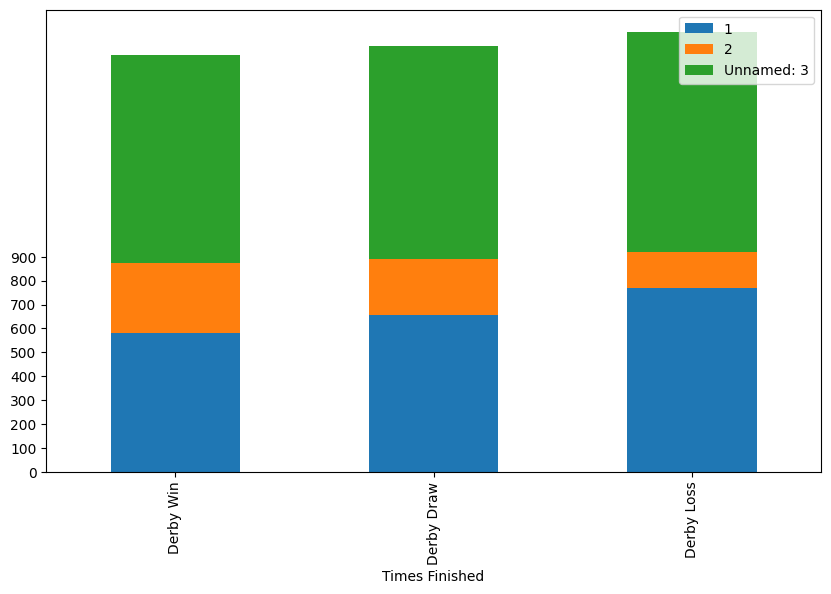

In [34]:
# Plot the DataFrame as a grouped bar chart
df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.yticks(range(0, 1000, 100))
plt.legend()
plt.show()

In [35]:
points_total = all_season_tables.groupby(['Position','Team', 'Points']).size().reset_index(name='TimesFinished_Pts').sort_values(['Position','Points'], ascending=[True,False]).reset_index(drop=True)
points_total

,Position,Team,Points,TimesFinished_Pts
0,1,Portsmouth,104,6
1,1,Portsmouth,102,17
2,1,Portsmouth,101,20
3,1,Portsmouth,100,18
4,1,Derby County,99,17
...,...,...,...,...
1661,24,Carlisle United,27,134
1662,24,Carlisle United,26,73
1663,24,Carlisle United,25,48
1664,24,Carlisle United,24,36


In [36]:
club_points_total = points_total[points_total['Team'] == 'Portsmouth']
club_points_total

,Position,Team,Points,TimesFinished_Pts
0,1,Portsmouth,104,6
1,1,Portsmouth,102,17
2,1,Portsmouth,101,20
3,1,Portsmouth,100,18
5,1,Portsmouth,99,60
6,1,Portsmouth,98,65
8,1,Portsmouth,97,72
10,1,Portsmouth,96,113
15,1,Portsmouth,95,87
17,1,Portsmouth,94,62


In [37]:


top2_finishes = club_points_total[club_points_total['Position'] <= 2]['TimesFinished_Pts'].sum()


In [38]:
# Sort the DataFrame by 'Points' in ascending order
club_points_total = club_points_total.sort_values('Points')
club_points_total['PercentageChance'] = club_points_total['TimesFinished_Pts']/10000 * 10
# # Plot two lines on the same graph
# plt.figure(figsize=(12, 6))
# plt.plot(club_points_total['Points'], club_points_total['Top2Percentage'], marker='o', color='blue', label='Percentage Chance of Top 2 Finish')
# plt.plot(club_points_total['Points'], club_points_total[club_points_total['Position'] == 1]['Top2Percentage'], marker='o', color='red', label='Percentage Chance of Position 1')
# plt.xlabel('Points Total')
# plt.ylabel('Percentage Chance')
# plt.title('Percentage Chance of Top 2 Finish and Position 1 at Every Points Total for Portsmouth')
# plt.legend()
# plt.grid(True)
# plt.show()

In [39]:
# Sum the 'TimesFinished_Pts' for every unique 'Points' instance
sum_times_finished_pts = club_points_total.groupby('Points')['TimesFinished_Pts'].sum()
sum_times_finished_pts

Points
83       2
85       1
86       2
87      11
88      23
89      33
90      54
91      69
92      77
93     134
94      99
95     107
96     126
97      75
98      65
99      61
100     18
101     20
102     17
104      6
Name: TimesFinished_Pts, dtype: int64

In [40]:
# Add the sum of 'TimesFinished_Pts' for every unique 'Points' instance as a new column
club_points_total['SumTimesFinishedPts'] = club_points_total['Points'].map(sum_times_finished_pts)
club_points_total

,Position,Team,Points,TimesFinished_Pts,PercentageChance,SumTimesFinishedPts
240,5,Portsmouth,83,1,0.001,2
190,4,Portsmouth,83,1,0.001,2
230,5,Portsmouth,85,1,0.001,1
225,5,Portsmouth,86,2,0.002,2
172,4,Portsmouth,87,7,0.007,11
130,3,Portsmouth,87,1,0.001,11
87,2,Portsmouth,87,2,0.002,11
220,5,Portsmouth,87,1,0.001,11
215,5,Portsmouth,88,1,0.001,23
167,4,Portsmouth,88,6,0.006,23


In [41]:
# Calculate the total number of times the club finished in the first position
total_first_positions = club_points_total[club_points_total['Position'] == 1]['TimesFinished_Pts'].sum()
total_first_positions
# Calculate the percentage chance of finishing in the first position at each possible points total
club_points_total['Position1Percentage'] = club_points_total[club_points_total['Position'] == 1]['TimesFinished_Pts'] / club_points_total.SumTimesFinishedPts * 100
# Calculate the total number of times the club finished in the top 2 position
total_top2_positions = club_points_total[club_points_total['Position'].isin([1,2])]['TimesFinished_Pts'].sum()
# Calculate the percentage chance of finishing in the first position at each possible points total
club_points_total['Top2Percentage'] = club_points_total[club_points_total['Position'].isin([1,2])]['TimesFinished_Pts'] / club_points_total.SumTimesFinishedPts * 100
club_points_total


,Position,Team,Points,TimesFinished_Pts,PercentageChance,SumTimesFinishedPts,Position1Percentage,Top2Percentage
240,5,Portsmouth,83,1,0.001,2,NaN,NaN
190,4,Portsmouth,83,1,0.001,2,NaN,NaN
230,5,Portsmouth,85,1,0.001,1,NaN,NaN
225,5,Portsmouth,86,2,0.002,2,NaN,NaN
172,4,Portsmouth,87,7,0.007,11,NaN,NaN
130,3,Portsmouth,87,1,0.001,11,NaN,NaN
87,2,Portsmouth,87,2,0.002,11,NaN,18.181818
220,5,Portsmouth,87,1,0.001,11,NaN,NaN
215,5,Portsmouth,88,1,0.001,23,NaN,NaN
167,4,Portsmouth,88,6,0.006,23,NaN,NaN


In [42]:
# Create a new DataFrame with non-NaN values of the 'Position1Percentage' column
pompey_first_place = club_points_total.dropna(subset=['Position1Percentage'])
pompey_first_place



,Position,Team,Points,TimesFinished_Pts,PercentageChance,SumTimesFinishedPts,Position1Percentage,Top2Percentage
40,1,Portsmouth,89,1,0.001,33,3.030303,3.030303
37,1,Portsmouth,90,7,0.007,54,12.962963,12.962963
32,1,Portsmouth,91,18,0.018,69,26.086957,26.086957
27,1,Portsmouth,92,27,0.027,77,35.064935,35.064935
22,1,Portsmouth,93,67,0.067,134,50.000000,50.000000
17,1,Portsmouth,94,62,0.062,99,62.626263,62.626263
15,1,Portsmouth,95,87,0.087,107,81.308411,81.308411
10,1,Portsmouth,96,113,0.113,126,89.682540,89.682540
8,1,Portsmouth,97,72,0.072,75,96.000000,96.000000
6,1,Portsmouth,98,65,0.065,65,100.000000,100.000000


In [43]:
pompey_top_2 = club_points_total.dropna(subset=['Top2Percentage'])
# top2chance = pompey_top_2.groupby('Points')['Top2Percentage'].sum()
# top2chance
# Sum the 'Top2Percentage' rows together at every unique points total within the same DataFrame
pompey_top_2['Top2Percentage'] = pompey_top_2.groupby('Points')['Top2Percentage'].transform('sum')
pompey_top_2

C:\Users\alexb\AppData\Local\Temp\ipykernel_17512\4092432832.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pompey_top_2['Top2Percentage'] = pompey_top_2.groupby('Points')['Top2Percentage'].transform('sum')


,Position,Team,Points,TimesFinished_Pts,PercentageChance,SumTimesFinishedPts,Position1Percentage,Top2Percentage
87,2,Portsmouth,87,2,0.002,11,NaN,18.181818
82,2,Portsmouth,88,5,0.005,23,NaN,21.739130
77,2,Portsmouth,89,14,0.014,33,NaN,45.454545
40,1,Portsmouth,89,1,0.001,33,3.030303,45.454545
72,2,Portsmouth,90,19,0.019,54,NaN,48.148148
37,1,Portsmouth,90,7,0.007,54,12.962963,48.148148
67,2,Portsmouth,91,35,0.035,69,NaN,76.811594
32,1,Portsmouth,91,18,0.018,69,26.086957,76.811594
27,1,Portsmouth,92,27,0.027,77,35.064935,89.610390
62,2,Portsmouth,92,42,0.042,77,NaN,89.610390


In [44]:
# Reverse the DataFrame and calculate the cumulative sum of the 'PercentageChance' column
club_points_total['CumulativePercentageChance'] = club_points_total.iloc[::-1]['PercentageChance'].cumsum() * 100
club_points_total

,Position,Team,Points,TimesFinished_Pts,PercentageChance,SumTimesFinishedPts,Position1Percentage,Top2Percentage,CumulativePercentageChance
240,5,Portsmouth,83,1,0.001,2,NaN,NaN,100.0
190,4,Portsmouth,83,1,0.001,2,NaN,NaN,99.9
230,5,Portsmouth,85,1,0.001,1,NaN,NaN,99.8
225,5,Portsmouth,86,2,0.002,2,NaN,NaN,99.7
172,4,Portsmouth,87,7,0.007,11,NaN,NaN,99.5
130,3,Portsmouth,87,1,0.001,11,NaN,NaN,98.8
87,2,Portsmouth,87,2,0.002,11,NaN,18.181818,98.7
220,5,Portsmouth,87,1,0.001,11,NaN,NaN,98.5
215,5,Portsmouth,88,1,0.001,23,NaN,NaN,98.4
167,4,Portsmouth,88,6,0.006,23,NaN,NaN,98.3


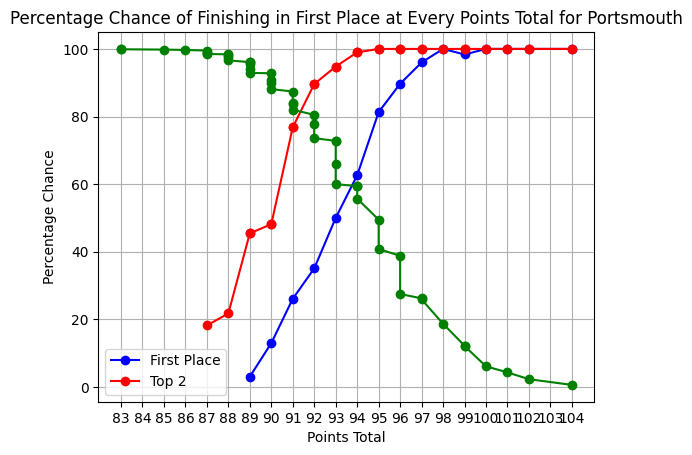

In [45]:
plt.plot(pompey_first_place['Points'], pompey_first_place['Position1Percentage'], marker='o', color='blue')
plt.plot(pompey_top_2.Points, pompey_top_2.Top2Percentage, marker='o', color='red')
plt.plot(club_points_total['Points'], club_points_total['CumulativePercentageChance'], marker='o', color='green')
plt.xlabel('Points Total')
plt.ylabel('Percentage Chance')
plt.title('Percentage Chance of Finishing in First Place at Every Points Total for Portsmouth')
plt.grid(True)
# Set the x-axis ticks to only show whole numbers
plt.xticks(range(int(min(club_points_total['Points'])), int(max(club_points_total['Points']))+1))
plt.legend(['First Place', 'Top 2'])
plt.show()

In [46]:
derby_points_total = points_total[points_total['Team'] == 'Derby County']
derby_points_total 

,Position,Team,Points,TimesFinished_Pts
4,1,Derby County,99,17
7,1,Derby County,97,51
9,1,Derby County,96,49
13,1,Derby County,95,39
16,1,Derby County,94,54
20,1,Derby County,93,44
25,1,Derby County,92,21
30,1,Derby County,91,17
35,1,Derby County,90,2
42,2,Derby County,97,7


In [47]:

top2_derby = derby_points_total[derby_points_total['Position'] <= 2]['TimesFinished_Pts'].sum()
top2_derby

735

In [48]:
derby_points_total = derby_points_total.sort_values('Points')
derby_points_total['PercentageChance'] = derby_points_total['TimesFinished_Pts']/10000 * 1000
sum_times_finished_pts = derby_points_total.groupby('Points')['TimesFinished_Pts'].sum()
sum_times_finished_pts
derby_points_total['SumTimesFinishedPts'] = derby_points_total['Points'].map(sum_times_finished_pts)
# Calculate the total number of times the club finished in the first position
total_first_positions = derby_points_total[derby_points_total['Position'] == 1]['TimesFinished_Pts'].sum()
total_first_positions
# Calculate the percentage chance of finishing in the first position at each possible points total
derby_points_total['Position1Percentage'] = derby_points_total[derby_points_total['Position'] == 1]['TimesFinished_Pts'] / derby_points_total.SumTimesFinishedPts * 100
# Calculate the total number of times the club finished in the top 2 position
total_top2_positions = derby_points_total[derby_points_total['Position'].isin([1,2])]['TimesFinished_Pts'].sum()
# Calculate the percentage chance of finishing in the first position at each possible points total
derby_points_total['Top2Percentage'] = derby_points_total[derby_points_total['Position'].isin([1,2])]['TimesFinished_Pts'] / derby_points_total.SumTimesFinishedPts * 100
# Reverse the DataFrame and calculate the cumulative sum of the 'PercentageChance' column
derby_points_total['CumulativePercentageChance'] = derby_points_total.iloc[::-1]['PercentageChance'].cumsum()
derby_points_total

,Position,Team,Points,TimesFinished_Pts,PercentageChance,SumTimesFinishedPts,Position1Percentage,Top2Percentage,CumulativePercentageChance
251,5,Derby County,81,2,0.2,2,NaN,NaN,100.0
244,5,Derby County,82,1,0.1,3,NaN,NaN,99.8
194,4,Derby County,82,2,0.2,3,NaN,NaN,99.7
238,5,Derby County,83,2,0.2,5,NaN,NaN,99.5
188,4,Derby County,83,3,0.3,5,NaN,NaN,99.3
141,3,Derby County,84,3,0.3,14,NaN,NaN,99.0
183,4,Derby County,84,5,0.5,14,NaN,NaN,98.7
233,5,Derby County,84,6,0.6,14,NaN,NaN,98.2
179,4,Derby County,85,15,1.5,25,NaN,NaN,97.6
228,5,Derby County,85,4,0.4,25,NaN,NaN,96.1


In [49]:
derby_first_place = derby_points_total.dropna(subset=['Position1Percentage'])
derby_first_place

,Position,Team,Points,TimesFinished_Pts,PercentageChance,SumTimesFinishedPts,Position1Percentage,Top2Percentage,CumulativePercentageChance
35,1,Derby County,90,2,0.2,85,2.352941,2.352941,63.1
30,1,Derby County,91,17,1.7,129,13.178295,13.178295,53.2
25,1,Derby County,92,21,2.1,94,22.340426,22.340426,42.7
20,1,Derby County,93,44,4.4,105,41.904762,41.904762,40.5
16,1,Derby County,94,54,5.4,107,50.467290,50.467290,24.8
13,1,Derby County,95,39,3.9,54,72.222222,72.222222,17.9
9,1,Derby County,96,49,4.9,65,75.384615,75.384615,14.0
7,1,Derby County,97,51,5.1,58,87.931034,87.931034,7.5
4,1,Derby County,99,17,1.7,17,100.000000,100.000000,1.7


In [50]:
derby_top2 = derby_points_total.dropna(subset=['Top2Percentage'])
# top2chance = derby_top2.groupby('Points')['Top2Percentage'].sum()
# top2chance
# Sum the 'Top2Percentage' rows together at every unique points total within the same DataFrame
derby_top2['Top2Percentage'] = derby_top2.groupby('Points')['Top2Percentage'].transform('sum')
derby_top2

C:\Users\alexb\AppData\Local\Temp\ipykernel_17512\54495652.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  derby_top2['Top2Percentage'] = derby_top2.groupby('Points')['Top2Percentage'].transform('sum')


,Position,Team,Points,TimesFinished_Pts,PercentageChance,SumTimesFinishedPts,Position1Percentage,Top2Percentage,CumulativePercentageChance
89,2,Derby County,86,1,0.1,28,NaN,3.571429,94.7
85,2,Derby County,87,8,0.8,42,NaN,19.047619,88.9
80,2,Derby County,88,24,2.4,75,NaN,32.000000,83.0
75,2,Derby County,89,44,4.4,92,NaN,47.826087,80.6
70,2,Derby County,90,57,5.7,85,NaN,69.411765,68.8
35,1,Derby County,90,2,0.2,85,2.352941,69.411765,63.1
65,2,Derby County,91,95,9.5,129,NaN,86.821705,62.7
30,1,Derby County,91,17,1.7,129,13.178295,86.821705,53.2
60,2,Derby County,92,62,6.2,94,NaN,88.297872,48.9
25,1,Derby County,92,21,2.1,94,22.340426,88.297872,42.7


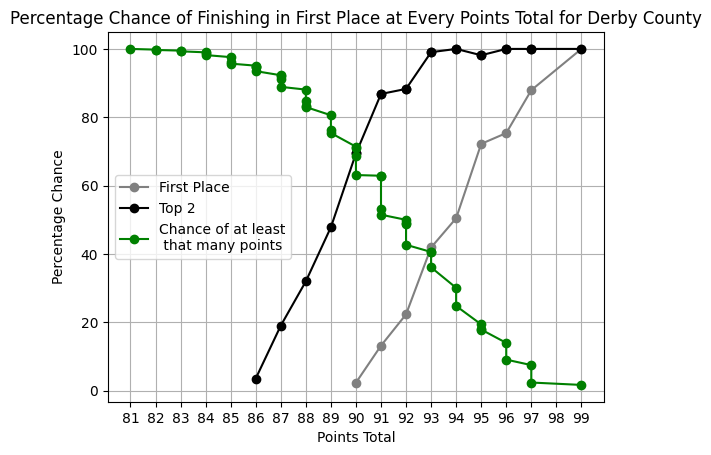

In [51]:
plt.plot(derby_first_place['Points'], derby_first_place['Position1Percentage'], marker='o', color='grey')
plt.plot(derby_top2.Points, derby_top2.Top2Percentage, marker='o', color='black')
plt.plot(derby_points_total['Points'], derby_points_total['CumulativePercentageChance'], marker='o', color='green')
plt.xlabel('Points Total')
plt.ylabel('Percentage Chance')
plt.title('Percentage Chance of Finishing in First Place at Every Points Total for Derby County')
plt.grid(True)
# Set the x-axis ticks to only show whole numbers
plt.xticks(range(int(min(derby_points_total['Points'])), int(max(derby_points_total['Points']))+1))
plt.legend(['First Place', 'Top 2', 'Chance of at least\n that many points'])
plt.show()

In [52]:
times_finished[times_finished['Team'] == 'Derby County']


,Position,Team,TimesFinished
1,1,Derby County,294
5,2,Derby County,441
13,3,Derby County,166
18,4,Derby County,75
26,5,Derby County,24


In [53]:
times_finished[times_finished['Team'] == 'Bolton Wanderers']

,Position,Team,TimesFinished
4,1,Bolton Wanderers,21
7,2,Bolton Wanderers,137
11,3,Bolton Wanderers,290
17,4,Bolton Wanderers,280
23,5,Bolton Wanderers,262
37,6,Bolton Wanderers,7
45,7,Bolton Wanderers,3


In [54]:
times_finished[times_finished['Team'] == 'Peterborough United']

,Position,Team,TimesFinished
2,1,Peterborough United,24
8,2,Peterborough United,101
10,3,Peterborough United,296
16,4,Peterborough United,294
24,5,Peterborough United,262
35,6,Peterborough United,22
55,8,Peterborough United,1
